In [189]:
import requests
import numpy as np
import json
import pandas as pd
import ibmseti
import collections
import scipy
import matplotlib.pyplot as plt
import commonutils as cu
from PIL import Image
import pybm3d
from skimage import data, io, filters
from skimage.restoration import (denoise_tv_chambolle, denoise_bilateral,
                                 denoise_wavelet, estimate_sigma)
from skimage import data, img_as_float, color
from skimage.util import random_noise
import cv2
from sklearn.preprocessing import normalize

In [190]:
import tensorflow as tf
# Creates a graph.
a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

[[ 22.  28.]
 [ 49.  64.]]


In [191]:
r = requests.get('https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b/simsignals_files/public_list_headers_3april_2017.txt')

In [192]:
fileList = r.text.split('\n')[:-1]
fileListJSON = [json.loads(entry) for entry in fileList]
fileListJSON[0]

{u'file_name': u'00069203-0824-4136-9c99-b9f68672f23d.dat',
 u'signal_classification': u'squigglesquarepulsednarrowband',
 u'uuid': u'00069203-0824-4136-9c99-b9f68672f23d'}

# Code for analyzing spectrogram generation

(129, 6144)


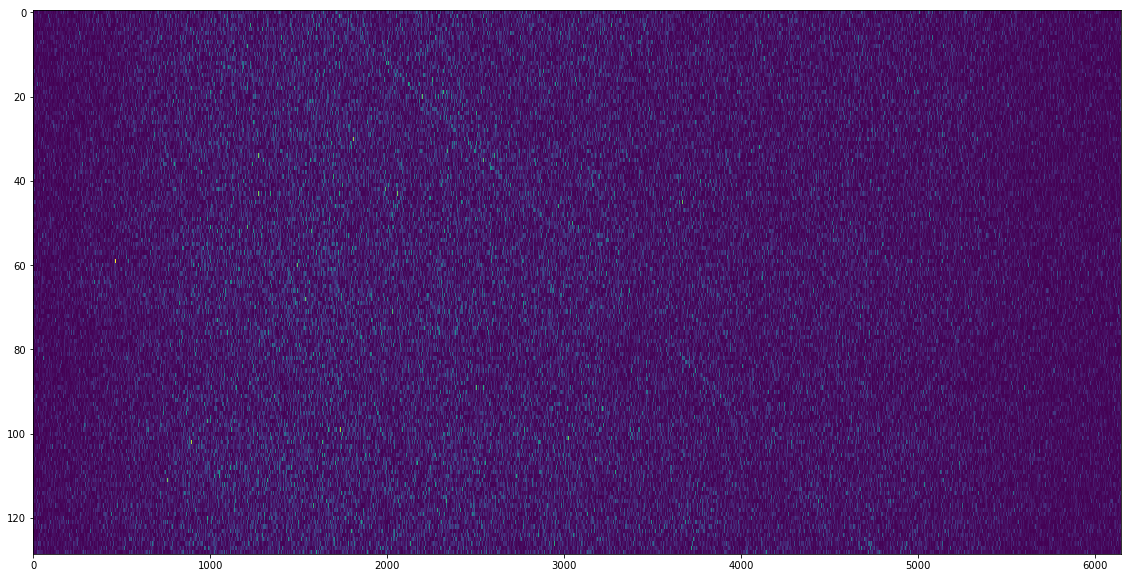

In [220]:
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'
# bright pixel - couldn't see any signal here visually
#fname = '10f26c01-5a62-44da-a489-3c2fabf010d7.dat'
#fname = '0196e075-9b1c-42d8-a13c-5b2b3814df2f.dat'
#fname = '019f43e7-01df-4e08-a25b-29c0387110f0.dat'
#fname = '01b7db03-b837-477d-a943-7ab3442e4052.dat'
#fname = '01d7910d-f2ec-4685-9569-dcd5ad6ac7b7.dat'
#fname = '020c38ae-43f2-4413-9c28-97af18abc096.dat'
#fname = '02271dff-b866-403d-872a-7b9eeebb2a6e.dat'
#fname = '02392dc5-68c4-481b-8196-d0be9e017df6.dat'
#fname = '02464dcd-8627-4dd3-86b2-43f96090400a.dat'
#fname = '02582067-307f-4e63-9f90-d04e80eed361.dat'
#fname = '025ee66e-a318-400c-b62b-850d31f6d0c2.dat'
# bright pixel - couldn't see any signal here visually
#fname = '01b7db03-b837-477d-a943-7ab3442e4052.dat'
#squiggle
#fname = '002193db-6f0e-4e2a-a7a4-6fc038a1b2a7.dat'
#squiggle
fname = '00187356-1b8e-48e2-a2e9-b3983983d2f1.dat'
#fname = '018872a6-b7f3-4ed9-bcfc-263a6249f2d2.dat'
#fname =  '019d208b-9d42-42c0-be7f-62c7d932b01e.dat'
#fname =  '01e07abb-c752-43e9-8938-e58b8af894dd.dat'
#fname =  '01f8d5df-2c75-4a56-afd1-704d07abe62b.dat'
#fname =  '020ba5ed-3344-4e4d-8f40-299e5604e206.dat'
#fname =  '029f4823-ed96-4f1d-b31b-e257e5a804f3.dat'
#fname =  '02afce62-af21-4931-b584-e80cc220f582.dat'
#fname =  '02c2140a-388f-4c45-aabf-d8db19a6bb3d.dat'
#fname =  '02fe0cc0-9562-46b8-8742-cc31ff1c843a.dat'
#fname =  '0310cd36-e4af-4b48-8565-d123e90a18e2.dat'
# narrow band
#fname = '01537aca-6c58-410a-96bc-d7ddcf2a3b50.dat'
#fname =  '0173a761-ab33-482d-939a-9e5b0c6ea46b.dat'
#fname = '018de612-bbf8-4a93-b6f3-228ee6e9a036.dat'
#fname =  '01938210-c78b-457d-a1ba-d74c963e0b5a.dat'
#fname =  '01a6b92e-cfbb-4dcc-9833-a797c9686788.dat'
#fname =  '01efda97-ca7a-4ca3-94d6-75b547a6cfe4.dat'
#fname =  '01fbbb2a-f557-4930-bae0-a65c6a2c0585.dat'
#fname =  '020c1527-7591-44b1-83d1-a0a704f8433e.dat'
#fname =  '0224ea7f-2554-4c47-b13e-f04af8a07a1e.dat'
#fname =  '02aa2163-5abd-4442-a72f-3eb79703330c.dat'
#fname =  '02bf5d69-6d95-477b-90ba-3be0c3bc0a14.dat'
# narrow band DRD
#fname = '0179a993-f7d1-41db-a39f-5190e826a4bc.dat'
#fname =  '0192fc3f-6f81-45de-8023-de6746dcb7d9.dat'
#fname =  '019eb2f3-907b-40f6-a83a-5f3b1666c9eb.dat'
#fname =  '01d2c643-575f-49d7-8674-15222c6767f2.dat'
#fname =  '01d3aa7d-e30d-4824-8a01-c3c174f25915.dat'
#fname =  '01e232fe-7d5f-4d80-8b18-2446caf4a3f1.dat'
#fname =  '01eac674-6718-4595-bc97-2d06c991b09a.dat'
#fname =  '020376b0-f777-416b-b338-43335c305ac7.dat'
#fname =  '021fa4aa-014a-4001-8ed8-ab62627ef44e.dat'
#fname =  '0232277a-c533-4039-a3b8-9cbbf903ce5a.dat'
# squared pulse narrow band
#fname = '017f886d-52b2-4a7a-8765-1d46d4b7398f.dat'
#fname =  '01941116-dbf6-4062-9336-651dc88ab60e.dat'
#fname =  '019caf8f-5438-4ed7-a3e6-beebd84d65b2.dat'
#fname =  '01de87c2-13b0-4856-825f-bd534703029d.dat'
#fname =  '01e52d66-a38a-4905-9683-80ef74b783ad.dat'
#fname =  '01ee3353-f090-4b97-ad2f-a4c13970951f.dat'
#fname =  '01fbd2d9-3b39-4b33-8a47-955cf35717d9.dat'
#fname =  '0209918f-571a-43ad-8307-004380e6e138.dat'
fname =  '0235701e-791c-46ed-a6e9-e090a7b7bf2c.dat'
#fname =  '0237063d-3f64-4bd5-91f6-02f3bcf1353f.dat'
# squiggle squared pulse narrow band
#fname =   '0176c146-6ff2-4742-aa07-b4a6bdd67876.dat'
#fname =    '01a407c6-574a-4fd0-9c37-ad56bb3483d1.dat'
#fname =    '01c9fb1d-3415-48dd-85f2-1c908449be64.dat'
#fname =    '01ca1408-fea8-4320-b6cf-bd1dbcc22c31.dat'
#fname =    '01f1100a-b8d6-49d9-bef3-ce6554f27af6.dat'
#fname =    '01fd8c46-2959-45c5-8fa1-827070586dd1.dat'
#fname =    '0207a7b4-4534-44cf-85f2-fa6fdaeb6033.dat'
#fname =    '0213c6d2-8642-4e80-ae4c-d3b690b753fc.dat'
#fname =    '02b54754-fe5a-4f73-a92c-05925a796b7a.dat'
#fname =    '02dd60ac-adfc-4cb4-a161-8e80d565966f.dat'

r1 = requests.get('{}/{}/{}'.format(base_url, container, fname))
aca1 = ibmseti.compamp.SimCompamp(r1.content)
spec1 = aca1.get_spectrogram()
print(spec1.shape)
#normalizing
spec1 = spec1/np.linalg.norm(spec1)
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow((spec1), aspect = 0.5*float(spec1.shape[1]) / spec1.shape[0],cmap="viridis")
specPath = 'data/marcTrial/'
pltType = '_sourcePlot'
plt.savefig("{}{}{}.png".format(specPath,fname,pltType))

# Local convolve operation

0235701e-791c-46ed-a6e9-e090a7b7bf2c.dat


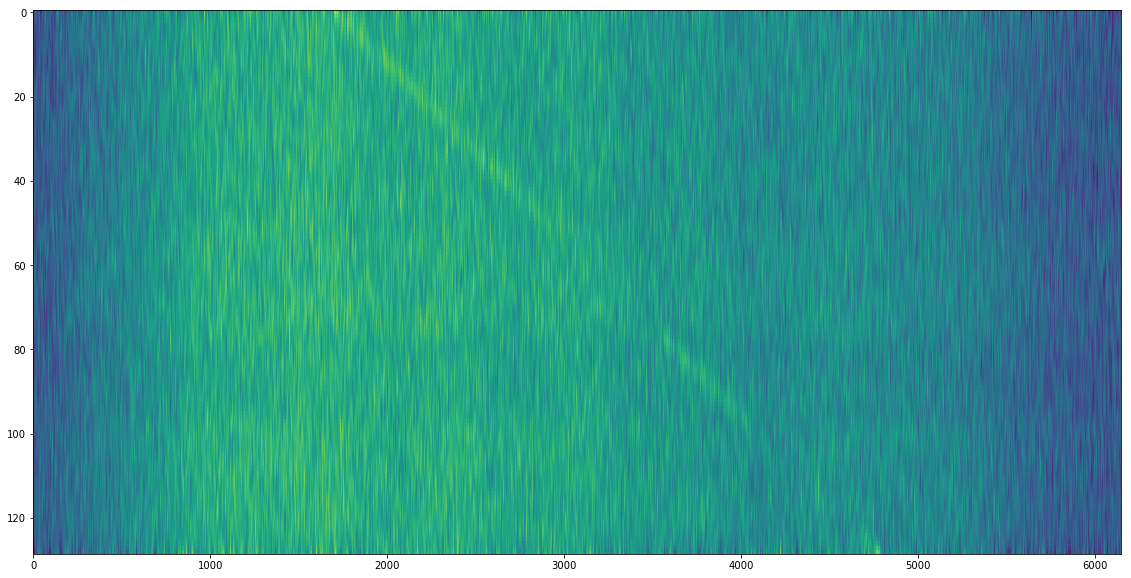

In [225]:
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'
r1 = requests.get('{}/{}/{}'.format(base_url, container, fname))
aca1 = ibmseti.compamp.SimCompamp(r1.content)
spec1 = aca1.get_spectrogram()
#normalizing
#spec1 = spec1/np.linalg.norm(spec1)
#spec1 = threshold(spec1, 0.001)
#print(spec1.shape)
#print(spec1)
# convolving with a gaussian filter
gaussSpec1 = scipy.ndimage.filters.gaussian_filter(spec1,sigma=2,order=0,mode="nearest")
#Thresholding - 
#from scipy.stats import threshold
#gaussSpec1 = threshold(gaussSpec1, 0.001)
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(np.square(gaussSpec1), aspect = 0.5*float(gaussSpec1.shape[1]) / gaussSpec1.shape[0],cmap="viridis")
specPath = 'data/marcTrial/'
pltType = '_gaussFilteredPlot'
plt.savefig("{}{}{}.png".format(specPath,fname,pltType))
print(fname)
#maxSpec1 = scipy.ndimage.filters.maximum_filter(gaussSpec1,2)
#ax.imshow(np.log(maxSpec1), aspect = 0.5*float(maxSpec1.shape[1]) / maxSpec1.shape[0])
#specPath = 'data/marcTrial/'
#pltType = '_maxFilteredPlot'
#plt.savefig("{}{}{}.png".format(specPath,fname,pltType))

## Testing BM3D

(129, 6144)
02fe0cc0-9562-46b8-8742-cc31ff1c843a.dat


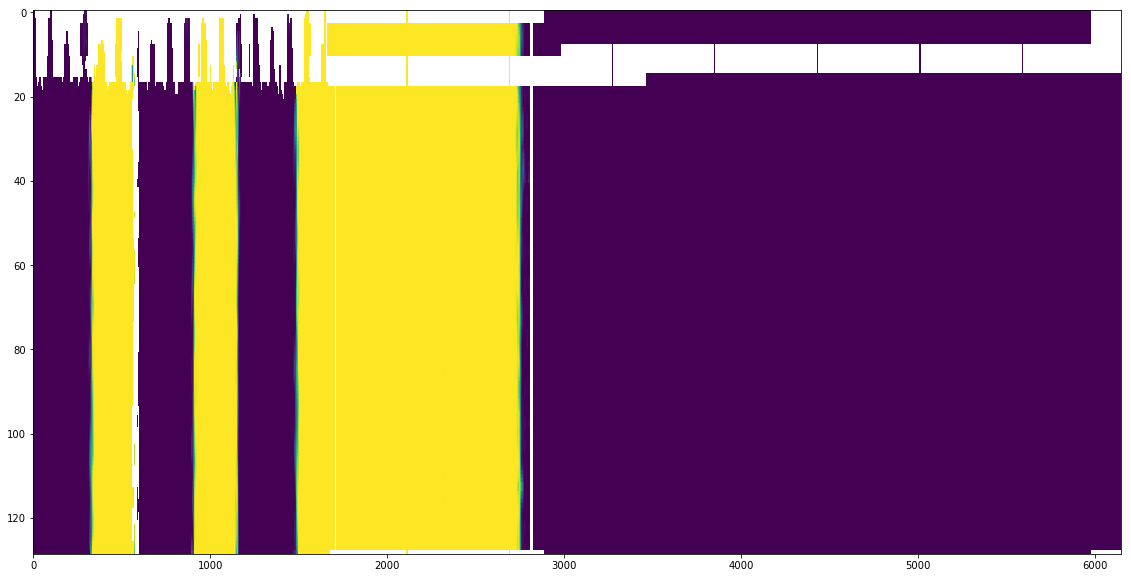

In [184]:
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'
r1 = requests.get('{}/{}/{}'.format(base_url, container, fname))
aca1 = ibmseti.compamp.SimCompamp(r1.content)
spec1 = aca1.get_spectrogram()
#normalizing
spec1 = spec1/np.linalg.norm(spec1)
print(spec1.shape)
#import skimage
#x  = skimage.data.camera().astype(np.float32)
#print(x.shape)
# convolving with a gaussian filter
gaussSpec1 = scipy.ndimage.filters.gaussian_filter(spec1,2)
gaussSpec1.shape = gaussSpec1.shape[0], gaussSpec1.shape[1], 1
gaussSpec1Float = gaussSpec1.astype(np.float32)
spec1GaussBm3d = pybm3d.bm3d.bm3d(gaussSpec1Float,10.0)
#spec1GaussBm3d =spec1GaussBm3d.reshape(spec1GaussBm3d.shape[0:1])
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(spec1GaussBm3d[:, :, 0], aspect = 0.5*float(spec1GaussBm3d.shape[1]) / spec1GaussBm3d.shape[0])
specPath = 'data/marcTrial/'
pltType = '_gauss_bm3d_FilteredPlot'
plt.savefig("{}{}{}.png".format(specPath,fname,pltType))
print(fname)

## Testing other image denoising techniques

(129, 6144)
02fe0cc0-9562-46b8-8742-cc31ff1c843a.dat


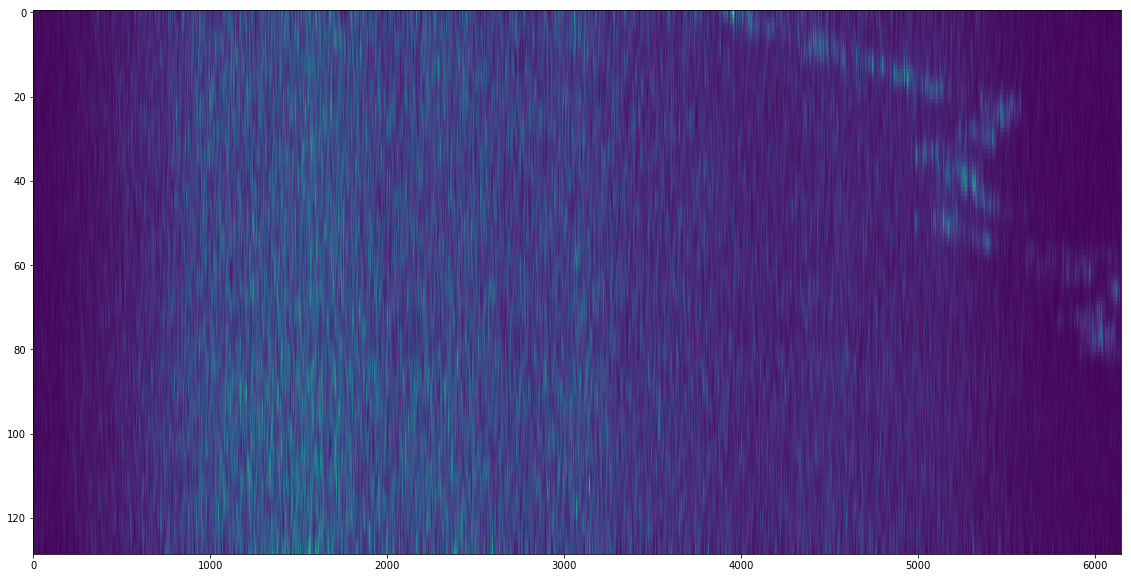

In [185]:
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'
r1 = requests.get('{}/{}/{}'.format(base_url, container, fname))
aca1 = ibmseti.compamp.SimCompamp(r1.content)
spec1 = aca1.get_spectrogram()
#normalizing
spec1 = spec1/np.linalg.norm(spec1)
print(spec1.shape)
#import skimage
#x  = skimage.data.camera().astype(np.float32)
#print(x.shape)
# convolving with a gaussian filter
gaussSpec1 = scipy.ndimage.filters.gaussian_filter(spec1,2)
%matplotlib inline
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(np.square(denoise_bilateral(gaussSpec1,multichannel=False)), aspect = 0.5*float(gaussSpec1.shape[1]) / gaussSpec1.shape[0])
#ax.imshow(np.log(gaussSpec1), aspect = 0.5*float(gaussSpec1.shape[1]) / gaussSpec1.shape[0])
specPath = 'data/marcTrial/'
pltType = '_gauss_bm3d_FilteredPlot'
plt.savefig("{}{}{}.png".format(specPath,fname,pltType))
print(fname)

## Testing edge detection

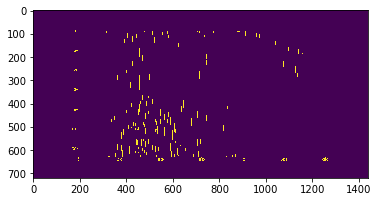

In [186]:
%matplotlib inline
import matplotlib.image as mpimg
#pltType = '_sourcePlot'
pltType = '_gaussFilteredPlot'
#image = mpimg.imread("{}{}{}.png".format(specPath,fname,pltType))
#edges = cv2.Canny(img,100,200)
image = cv2.imread("{}{}{}.png".format(specPath,fname,pltType))
edges = cv2.Canny(image,200,100)
np.histogram(image) 
plt.imshow(edges)
plt.show()
#print(img.shape)
#print(img)
#edges = cv2.Canny(img,100,200)
#fig, ax = plt.subplots(figsize=(20, 10))
#ax.imshow(img,aspect=img.shape[1]/img.shape[0])
#print(fname)

# Regenerating image as gray scale

data/marcTrial/02fe0cc0-9562-46b8-8742-cc31ff1c843a.dat_gaussFilteredPlot.png


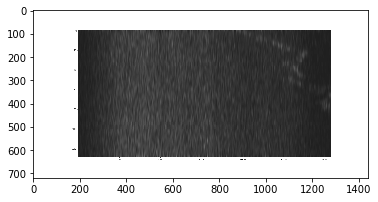

In [187]:
fname = "{}{}_gaussFilteredPlot.png".format(specPath,fname)
#print("{}{}_gaussFilteredPlot.png".format(specPath,fname))
print fname
image = Image.open(fname).convert("L")
arr = np.asarray(image)
#print(arr.shape)
plt.imshow(arr, cmap='gray')
plt.show()

## Code for downloading a subset of data (skip if not required)

In [4]:
# Taking a subset of signals to download and play around with
subset = dict.fromkeys(list(np.unique([ str(file['signal_classification']) for file in fileListJSON])))
for key in subset.keys(): subset[key] = []
nSignals = 10
i = 0
while any( [len(v)<nSignals for v in subset.values()] ):
    current = (str(fileListJSON[i]['signal_classification']),str(fileListJSON[i]['file_name']))
    if len(subset[current[0]])<nSignals:
        subset[current[0]].append(current[1])
    i = i + 1

In [5]:
# For each type, download all files, and extract and save complex signal and spectrogram
base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
container = 'simsignals'

subsetComplexSignals = collections.defaultdict(list)
subsetSpectrograms = collections.defaultdict(list)

for (signalType,signalList) in subset.items():
    print signalType
    for fname in signalList:
        r = requests.get('{}/{}/{}'.format(base_url,container,fname))
        aca = ibmseti.compamp.SimCompamp(r.content)
        subsetComplexSignals[signalType].append(aca.complex_data().reshape(129,6144))
        subsetSpectrograms[signalType].append(aca.get_spectrogram())

noise
squiggle
narrowbanddrd
brightpixel
narrowband
squigglesquarepulsednarrowband
squarepulsednarrowband


In [6]:
# Saving numpy files 
np.save('complexSignalsSubset.npy',subsetComplexSignals)
np.save('specSubset.npy',subsetSpectrograms)

# Saving to separate matlab files for each signal type
# for key in subset.keys():
#     a = np.stack(subsetComplexSignals[key])
#     b = np.stack(subsetSpectrograms[key])
#     scipy.io.savemat('{}{}'.format(key,'Signal.mat'),{'{}{}'.format(key,'Signal'):a})
#     scipy.io.savemat('{}{}'.format(key,'Spec.mat'),{'{}{}'.format(key,'Spec'):b})

### Loading saved npy files

In [7]:
# Loading in saved sample data files 
subsetComplexSignals = np.load('complexSignalsSubset.npy')[()]
subsetSpectrograms = np.load('specSubset.npy')[()]

## Downloading and saving all files to local 

In [6]:
# Create a data frame with all the file info
fileListTuples = [(str(j['file_name']),str(j['signal_classification']),str(j['uuid'])) for j in fileListJSON]
fileListDF = pd.DataFrame.from_records(fileListTuples,columns=["file_name","signal_classification","uuid"])
# Creating a file index. Will use this for filenames for easier reference
fileListDF['file_index'] = fileListDF.index
fileListDF['file_index'] = fileListDF.file_index.apply(lambda x: str.zfill(str(x),6) )
## Assigning numbers to classes
labelMap = {'noise':0,'brightpixel':1,'narrowband':2,
            'narrowbanddrd':3,'squarepulsednarrowband':4,'squiggle':5,'squigglesquarepulsednarrowband':6}
fileListDF["label"] = fileListDF["signal_classification"].apply(lambda x: labelMap[x])
print labelMap
fileListDF.to_csv("fileList.csv",index=False)
fileListDF.ix[0:10]

{'noise': 0, 'squiggle': 5, 'narrowbanddrd': 3, 'brightpixel': 1, 'narrowband': 2, 'squigglesquarepulsednarrowband': 6, 'squarepulsednarrowband': 4}


,file_name,signal_classification,uuid,file_index,label
0,00069203-0824-4136-9c99-b9f68672f23d.dat,squigglesquarepulsednarrowband,00069203-0824-4136-9c99-b9f68672f23d,000000,6
1,000739aa-89d6-4965-abf6-9b46a246604a.dat,narrowband,000739aa-89d6-4965-abf6-9b46a246604a,000001,2
2,000874dd-8d6e-44b1-8ade-21aeb5a29546.dat,narrowbanddrd,000874dd-8d6e-44b1-8ade-21aeb5a29546,000002,3
3,0009073c-4032-4b84-832a-9b81fc3b0df8.dat,brightpixel,0009073c-4032-4b84-832a-9b81fc3b0df8,000003,1
4,000c28b3-aeba-4f18-ac60-b91341921264.dat,squigglesquarepulsednarrowband,000c28b3-aeba-4f18-ac60-b91341921264,000004,6
5,000eb18b-326f-4488-9f07-b7382c01bf91.dat,narrowband,000eb18b-326f-4488-9f07-b7382c01bf91,000005,2
6,00126c99-d882-4b4f-a308-618c1b5c2613.dat,squiggle,00126c99-d882-4b4f-a308-618c1b5c2613,000006,5
7,00187356-1b8e-48e2-a2e9-b3983983d2f1.dat,squigglesquarepulsednarrowband,00187356-1b8e-48e2-a2e9-b3983983d2f1,000007,6
8,001d473c-be64-4411-8a3d-7f7160f94de4.dat,squigglesquarepulsednarrowband,001d473c-be64-4411-8a3d-7f7160f94de4,000008,6
9,001f3507-f359-4822-8d16-b7320caf2a9e.dat,squarepulsednarrowband,001f3507-f359-4822-8d16-b7320caf2a9e,000009,4


In [14]:
# Function: input - JSON line with url, output - spectrogram array
def downloadSaveSignalData(DFrow):
    # Access file via HTTP method
    base_url = 'https://dal.objectstorage.open.softlayer.com/v1/AUTH_cdbef52bdf7a449c96936e1071f0a46b'
    container = 'simsignals'
    fname = DFrow['file_name']
    data_path = "data/specdataraw"
    print "\r{}".format(DFrow["file_index"]),
    r = requests.get('{}/{}/{}'.format(base_url, container, fname))   
    aca = ibmseti.compamp.SimCompamp(r.content)
    np.save("{}/{}.npy".format(data_path,DFrow['file_index']),aca.get_spectrogram()) 

### Iterate through fileListDF and run generateSpectrogram to save each file to local as .npy file
### Use file_index for filename
temp = fileListDF.apply(downloadSaveSignalData,axis=1)
del temp

015984
